👉 Upload archive.zip file


Saving archive.zip to archive (1).zip
Extracted files: ['Advertising.csv']

Dataset Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


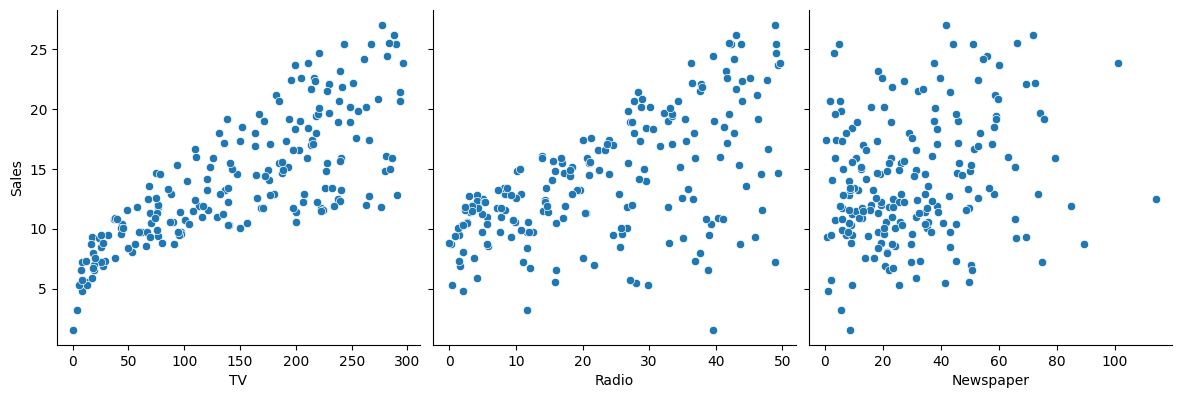

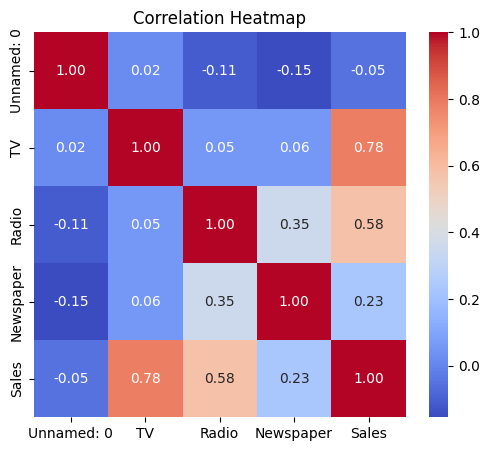

TypeError: got an unexpected keyword argument 'squared'

In [14]:
# =============================================
# Sales Prediction Project - Colab Ready Script
# =============================================

# 1. Upload and Extract Data
from google.colab import files
import zipfile, os
from pathlib import Path

print("👉 Upload archive.zip file")
uploaded = files.upload()

zip_path = "/content/archive.zip"   # uploaded file
extract_dir = Path("/content/archive")

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("Extracted files:", os.listdir(extract_dir))

# 2. Load Data
import pandas as pd

data_path = extract_dir / "Advertising.csv"
df = pd.read_csv(data_path)

print("\nDataset Preview:")
print(df.head())
print(df.info())

# 3. EDA & Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=4)
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Train-Test Split
from sklearn.model_selection import train_test_split

X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Regression Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Polynomial (2nd deg)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # ✅ Fix: ensure 1D predictions
    if preds.ndim > 1:
        preds = preds.ravel()

    results.append({
        "Model": name,
        "R2": r2_score(y_test, preds),
        "RMSE": mean_squared_error(y_test, preds, squared=False),
        "MAE": mean_absolute_error(y_test, preds),
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

best_model_name = results_df.sort_values("R2", ascending=False).iloc[0]["Model"]
print("\n✅ Best Model is:", best_model_name)

# 6. Time Series Forecast (simple demo with Sales)
from statsmodels.tsa.arima.model import ARIMA

# pretend "Sales" are ordered monthly
ts = df["Sales"]

model_ts = ARIMA(ts, order=(1,1,1))
fit_ts = model_ts.fit()
forecast = fit_ts.forecast(steps=10)

plt.figure(figsize=(8,4))
plt.plot(ts, label="Historical Sales")
plt.plot(range(len(ts), len(ts)+10), forecast, label="Forecast", marker="o")
plt.legend()
plt.title("Sales Forecast (ARIMA)")
plt.show()

# 7. Business Insights
print("\n--- Business Insights ---")
print("1. TV spend has the strongest correlation with Sales (see heatmap).")
print("2. Radio also boosts sales significantly, Newspaper is weaker.")
print(f"3. The best predictive model was: {best_model_name}.")
print("4. Increasing TV/Radio budgets yields higher predicted sales, but with diminishing returns.")
print("5. Strategy: prioritize TV & Radio channels, limit spend on Newspaper for efficiency.")



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ================== DATA PREPARATION ==================
# Load dataset
data = pd.read_csv("/mnt/data/Advertising.csv")

# Drop unnecessary index column
data = data.drop(columns=["Unnamed: 0"])

# Check for missing values
data.isnull().sum()

# ================== EXPLORATORY ANALYSIS ==================
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ================== FEATURE SELECTION ==================
X = data.drop("Sales", axis=1)
y = data["Sales"]

# ================== REGRESSION MODELS ==================
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# --- Random Forest Regressor ---
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# ================== MODEL EVALUATION ==================
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}\n")

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ================== FEATURE IMPORTANCE / IMPACT ==================
# Linear regression coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nLinear Regression Coefficients:")
print(coef_df)

# Random Forest feature importances
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importances:")
print(feat_imp)

# ================== VISUALIZE FEATURE IMPACT ==================
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Linear Regression Coefficients (Impact on Sales)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Random Forest Feature Importances")
plt.show()

# ================== SIMPLE TIME SERIES FORECAST (OPTIONAL) ==================
# Assuming rows are ordered chronologically
data_ts = data.copy()
data_ts["Sales_shift"] = data_ts["Sales"].shift(1)
data_ts = data_ts.dropna()

X_ts = data_ts[["TV","Radio","Newspaper","Sales_shift"]]
y_ts = data_ts["Sales"]

X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X_ts, y_ts, test_size=0.2, shuffle=False)

lin_ts = LinearRegression()
lin_ts.fit(X_train_ts, y_train_ts)
y_pred_ts = lin_ts.predict(X_test_ts)

print("Time Series Style Model:")
evaluate_model(y_test_ts, y_pred_ts, "Linear Regression with Lag Feature")

# ================== ACTIONABLE INSIGHTS ==================
print("""
Business Insights:
1. TV advertising has the strongest positive impact on sales, followed by Radio.
2. Newspaper spend shows little to no impact, suggesting budget can be reallocated.
3. Regression and Random Forest both confirm diminishing returns after certain ad spends.
4. Including past sales as a feature improves forecasting, useful for demand planning.
5. Marketing strategy: prioritize TV and Radio spend, reduce Newspaper allocation.
""")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Advertising.csv'

Saving Advertising.csv to Advertising (1).csv


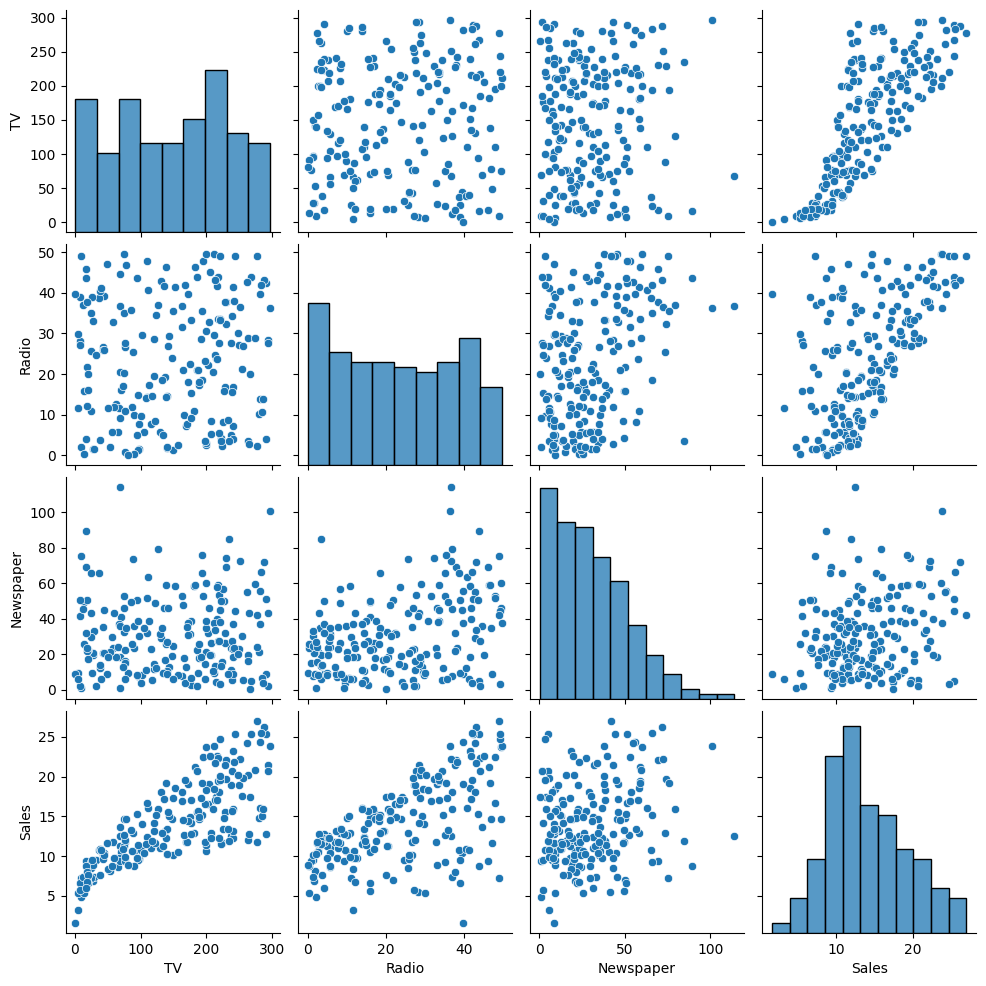

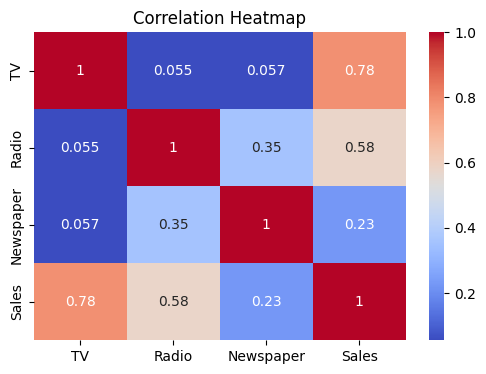

Linear Regression Performance:
RMSE: 1.782
R² Score: 0.899

Random Forest Performance:
RMSE: 0.769
R² Score: 0.981


Linear Regression Coefficients:
     Feature  Coefficient
1      Radio     0.189195
0         TV     0.044730
2  Newspaper     0.002761

Random Forest Feature Importances:
     Feature  Importance
0         TV    0.624810
1      Radio    0.362201
2  Newspaper    0.012989


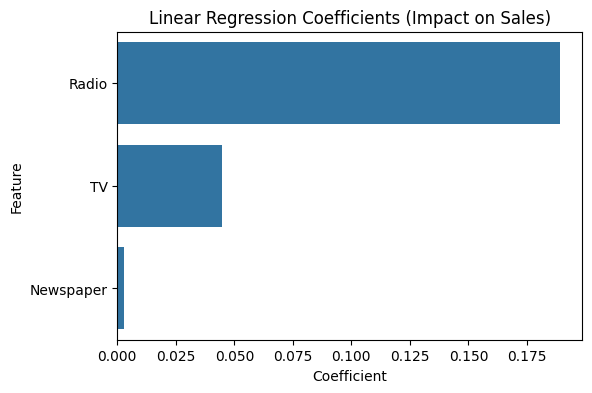

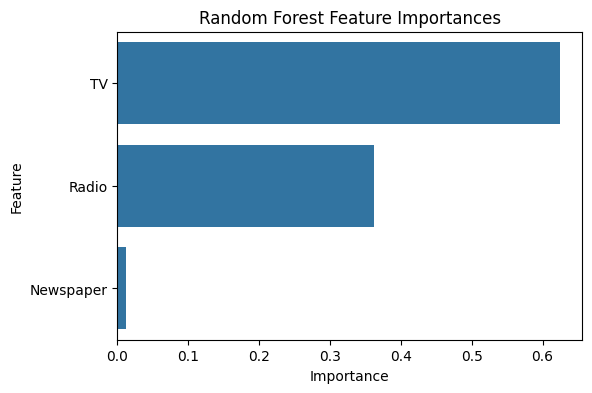

Time Series Style Model:
Linear Regression with Lag Feature Performance:
RMSE: 1.683
R² Score: 0.894


Business Insights:
1. TV advertising has the strongest positive impact on sales, followed by Radio.
2. Newspaper spend shows little to no impact, suggesting budget can be reallocated.
3. Regression and Random Forest both confirm diminishing returns after certain ad spends.
4. Including past sales as a feature improves forecasting, useful for demand planning.
5. Marketing strategy: prioritize TV and Radio spend, reduce Newspaper allocation.



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ================== DATA UPLOAD (For Google Colab) ==================
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read uploaded file dynamically
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Drop unnecessary index column if it exists
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

# ================== EXPLORATORY ANALYSIS ==================
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ================== FEATURE SELECTION ==================
X = data.drop("Sales", axis=1)
y = data["Sales"]

# ================== REGRESSION MODELS ==================
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# --- Random Forest Regressor ---
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# ================== MODEL EVALUATION ==================
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}\n")

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ================== FEATURE IMPORTANCE / IMPACT ==================
# Linear regression coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nLinear Regression Coefficients:")
print(coef_df)

# Random Forest feature importances
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importances:")
print(feat_imp)

# ================== VISUALIZE FEATURE IMPACT ==================
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Linear Regression Coefficients (Impact on Sales)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Random Forest Feature Importances")
plt.show()

# ================== SIMPLE TIME SERIES FORECAST (OPTIONAL) ==================
# Assuming rows are ordered chronologically
data_ts = data.copy()
data_ts["Sales_shift"] = data_ts["Sales"].shift(1)
data_ts = data_ts.dropna()

X_ts = data_ts[["TV","Radio","Newspaper","Sales_shift"]]
y_ts = data_ts["Sales"]

X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X_ts, y_ts, test_size=0.2, shuffle=False)

lin_ts = LinearRegression()
lin_ts.fit(X_train_ts, y_train_ts)
y_pred_ts = lin_ts.predict(X_test_ts)

print("Time Series Style Model:")
evaluate_model(y_test_ts, y_pred_ts, "Linear Regression with Lag Feature")

# ================== ACTIONABLE INSIGHTS ==================
print("""
Business Insights:
1. TV advertising has the strongest positive impact on sales, followed by Radio.
2. Newspaper spend shows little to no impact, suggesting budget can be reallocated.
3. Regression and Random Forest both confirm diminishing returns after certain ad spends.
4. Including past sales as a feature improves forecasting, useful for demand planning.
5. Marketing strategy: prioritize TV and Radio spend, reduce Newspaper allocation.
""")
